In [109]:
%matplotlib inline

In [110]:
import numpy as np

In [111]:
import pandas as pd

from sklearn.model_selection import train_test_split

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
credit_df = pd.read_csv("d:\gli\dse\data\credit.csv")

In [114]:
credit_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


In [115]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in credit_df.columns: # Loop through all columns in the dataframe
    if credit_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        credit_df[feature] = pd.Categorical(credit_df[feature]).codes # Replace strings with an integer

In [116]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null int8
months_loan_duration    1000 non-null int64
credit_history          1000 non-null int8
purpose                 1000 non-null int8
amount                  1000 non-null int64
savings_balance         1000 non-null int8
employment_duration     1000 non-null int8
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null int8
housing                 1000 non-null int8
existing_loans_count    1000 non-null int64
job                     1000 non-null int8
dependents              1000 non-null int64
phone                   1000 non-null int8
default                 1000 non-null int8
dtypes: int64(7), int8(10)
memory usage: 64.6 KB


d:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
d:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


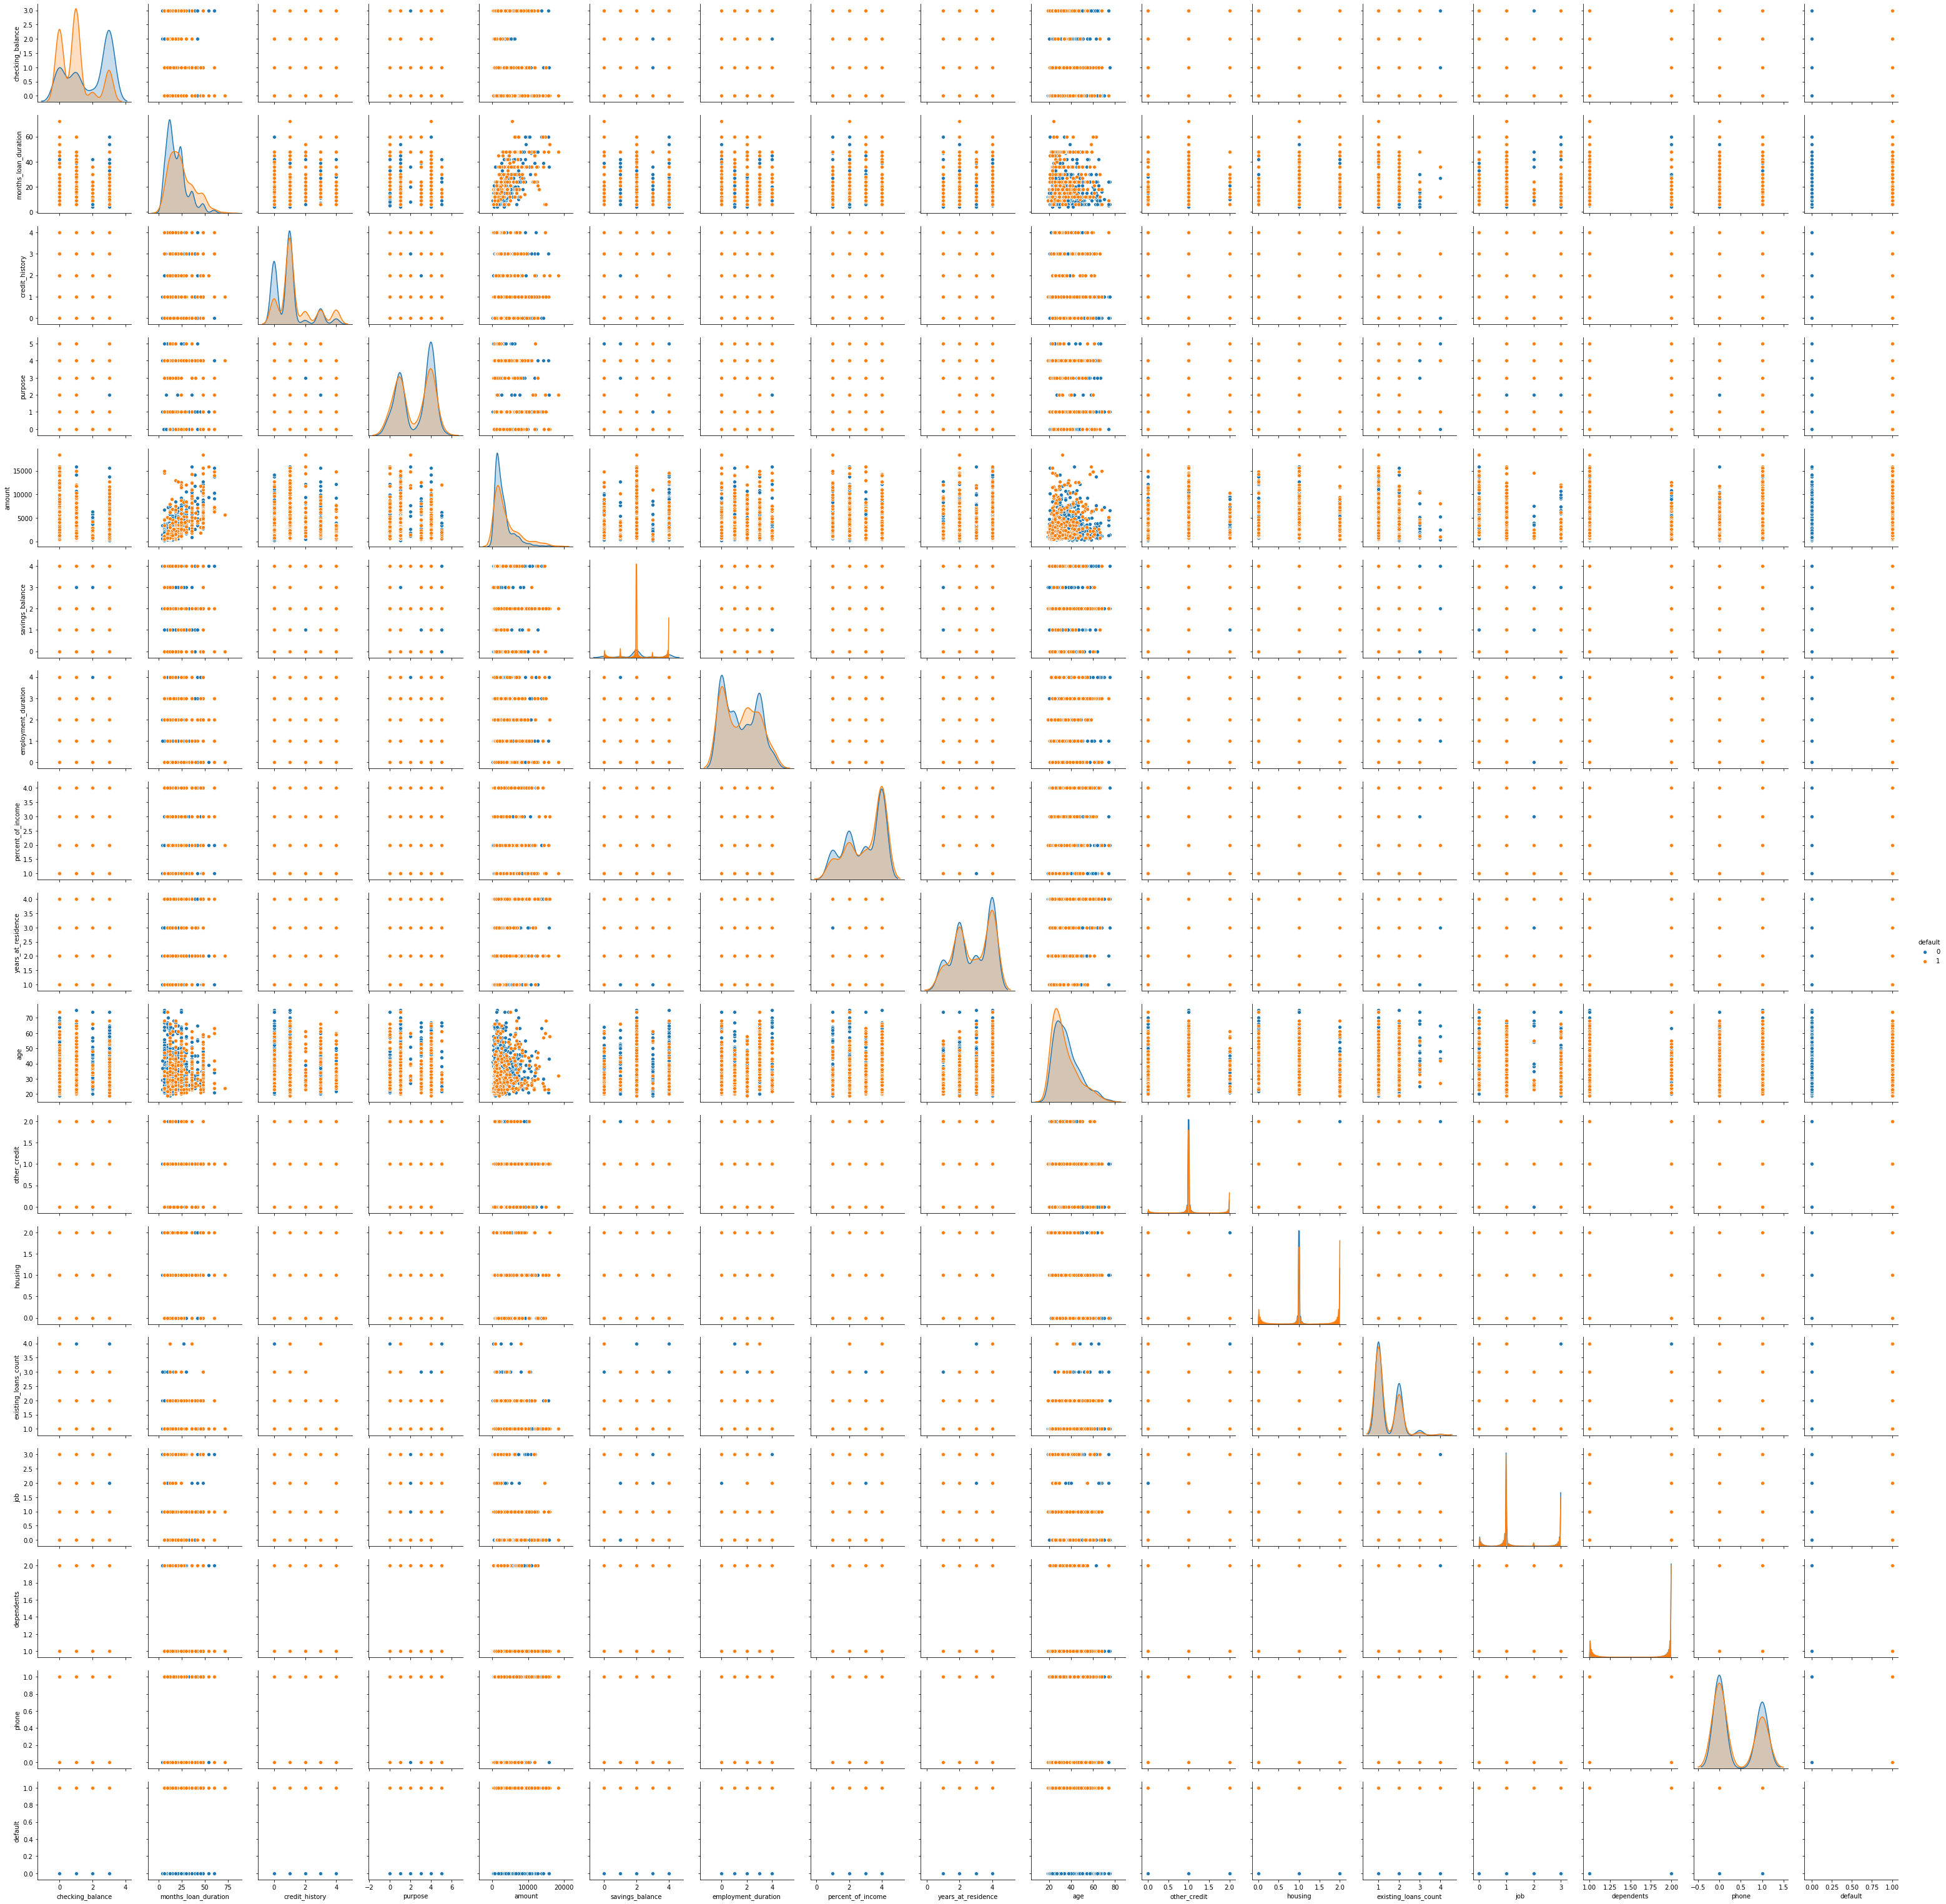

In [123]:
import seaborn as sns

sns.pairplot(credit_df,  hue = "default" , diag_kind = 'kde')

col_labels = [ 'checking_balance', 'months_loan_duration' ,'credit_history' , 'purpose, amount', 'savings_balance' , 'employment_duration'
, 'percent_of_income', 'years_at_residence', 'age', 'other_credit', 'housing', 'existing_loans_count', 'job', 'dependents', 'phone', 'default']

train_char_label = ['No', 'Yes']

In [117]:
credit_df.shape

(1000, 17)

In [118]:
# splitting data into training and test set for independent attributes

array = credit_df.values
X = array[:,0:16] 
y = array[:,16]
train_set, test_set, train_labels, test_labels = train_test_split(X, y , test_size=.30, random_state=0)

In [119]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

#dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy' , random_state=1)

In [120]:
dt_model.fit(train_set, train_labels )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [121]:
dt_model.score(train_set, train_labels)

1.0

In [122]:
dt_model.score(test_set , test_labels)

0.6933333333333334

Regularising the Decision Tree

In [88]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=1 )
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [89]:
test_pred = dt_model.predict(test_set)

In [90]:
print(dt_model.score(train_set , train_labels))

print(dt_model.score(test_set , test_labels))

0.7671428571428571
0.68


In [91]:
from sklearn.metrics import classification_report
print(classification_report(test_labels , test_pred))


              precision    recall  f1-score   support

           0       0.77      0.78      0.78       214
           1       0.44      0.43      0.44        86

    accuracy                           0.68       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.68      0.68      0.68       300



## Ensemble Learning - Bagging

In [93]:
credit_labels = credit_df.pop("default")  # Separating lables from predictors

In [97]:
# In the following lines, we call the bagging classifer with oob_score (out of bag score) set to true which false by default
# This makes the baggingclassifier use the 37% unused data for testing
# Compare the performance of the BGCL with regularized dt above. 
# Though not required, you can keep separate test data (outside the bootstrap sampling) on which we test the BGCL
# 

from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=10 , oob_score=True)

bgcl = bgcl.fit(train_set, train_labels)
print(bgcl.oob_score_)

0.6742857142857143


d:\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:633: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:638: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


In [98]:
test_pred = bgcl.predict(test_set)

In [99]:
print(classification_report(test_labels , test_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       214
           1       0.62      0.44      0.52        86

    accuracy                           0.76       300
   macro avg       0.71      0.67      0.68       300
weighted avg       0.75      0.76      0.75       300



## Ensemble Learning - AdaBoosting

In [100]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = abcl.fit(train_set, train_labels)


In [101]:
test_pred = abcl.predict(test_set)
abcl.score(test_set , test_labels)

0.7366666666666667

In [102]:
print(classification_report(test_labels , test_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       214
           1       0.55      0.49      0.52        86

    accuracy                           0.74       300
   macro avg       0.67      0.66      0.67       300
weighted avg       0.73      0.74      0.73       300



## Ensemble Learning - GradientBoost

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, random_state=1)
gbcl = gbcl.fit(train_set, train_labels)

In [104]:
test_pred = gbcl.predict(test_set)
gbcl.score(test_set , test_labels)

0.77

In [105]:
print(classification_report(test_labels , test_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       214
           1       0.64      0.44      0.52        86

    accuracy                           0.77       300
   macro avg       0.72      0.67      0.69       300
weighted avg       0.76      0.77      0.76       300



## Ensemble RandomForest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1)
rfcl = rfcl.fit(train_set, train_labels)

In [107]:
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.7733333333333333

In [108]:
print(classification_report(test_labels , test_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       214
           1       0.65      0.47      0.54        86

    accuracy                           0.77       300
   macro avg       0.73      0.68      0.70       300
weighted avg       0.76      0.77      0.76       300

